In [1]:
# Loading required libraries
library(tidyverse)
library(lubridate)
library(dplyr)
library(tidyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Importing dataset
daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# View first 6 rows of the dataset
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
# Checking for missing value in dataset
sapply(daily_activity, function(x) sum(is.na(x)))

Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0

In [5]:
# Viewing the content of the dataset
str(daily_activity)

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

In [6]:
# Count number of distint "Id"
length(unique(daily_activity$Id))

[1] 33

In [7]:
# Convert ActivityDate to date data type and format to yyy-mm-dd
daily_activity$ActivityDate <- mdy(daily_activity$ActivityDate)

In [8]:
str(daily_activity)

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : Date[1:940], format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264 20

In [9]:
# Viewing first 6 row of ActivityDate column
head(daily_activity$ActivityDate)

[1] "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16"
[6] "2016-04-17"

In [10]:
# create new column "day_of_the_week" to represent day of the week 
daily_activity$DayOfWeek <- format(as.Date(daily_activity$ActivityDate), "%A")

In [11]:
head(daily_activity$DayOfWeek)

[1] "Tuesday"   "Wednesday" "Thursday"  "Friday"    "Saturday"  "Sunday"

In [12]:
# create new column "total_mins" containing sum of total minutes.
daily_activity$TotalMins = rowSums(daily_activity[,c("VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes")])

In [13]:
head(daily_activity$TotalMins)

[1] 1094 1033 1440  998 1040  761

In [14]:
# create new column *total_hours* by converting to hour and round float to two decimal places
daily_activity$TotalHours <- round(daily_activity$TotalMins/60, 2)

In [15]:
head(daily_activity$TotalHours)

[1] 18.23 17.22 24.00 16.63 17.33 12.68

In [16]:
# Viewing general statistics
summary(daily_activity)

       Id             ActivityDate          TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Median :2016-04-26   Median : 7406   Median : 5.245  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDist

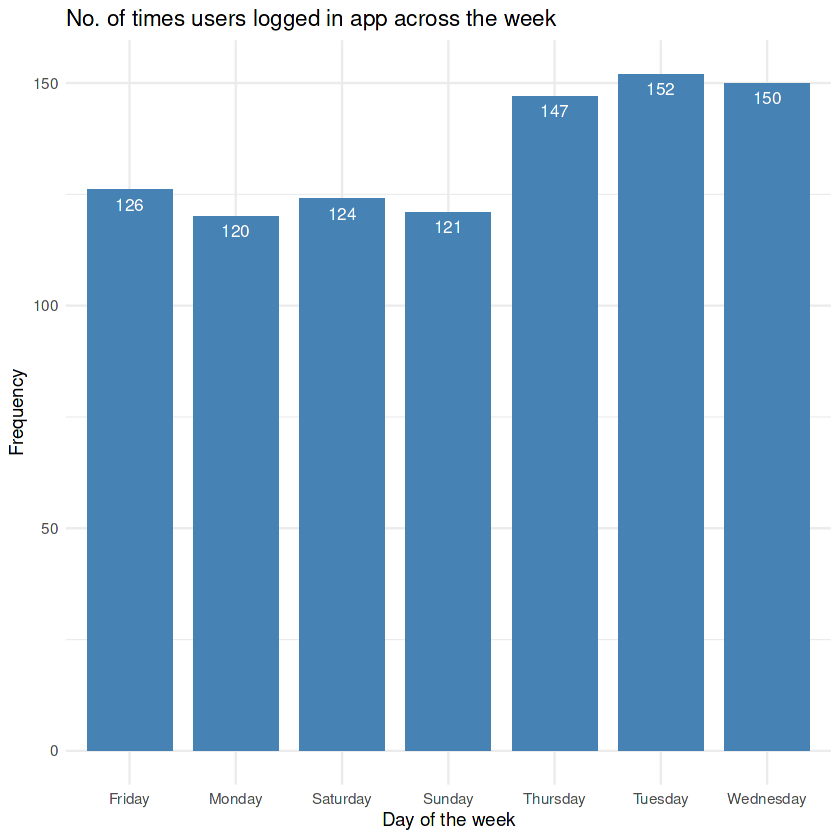

In [17]:
# Plotting no. of times users logged in app across each day of the week
week_frequency <- daily_activity %>% 
    group_by(DayOfWeek) %>% summarise(count=n())
ggplot(week_frequency, aes(x = DayOfWeek, y = count)) +
geom_bar(stat="identity", fill = "steelblue", width = 0.8) +
labs(title = "No. of times users logged in app across the week", x = "Day of the week", y = "Frequency") +
geom_text(aes(label = count), vjust = 1.6, color = "white", size = 3.5)+
theme_minimal()

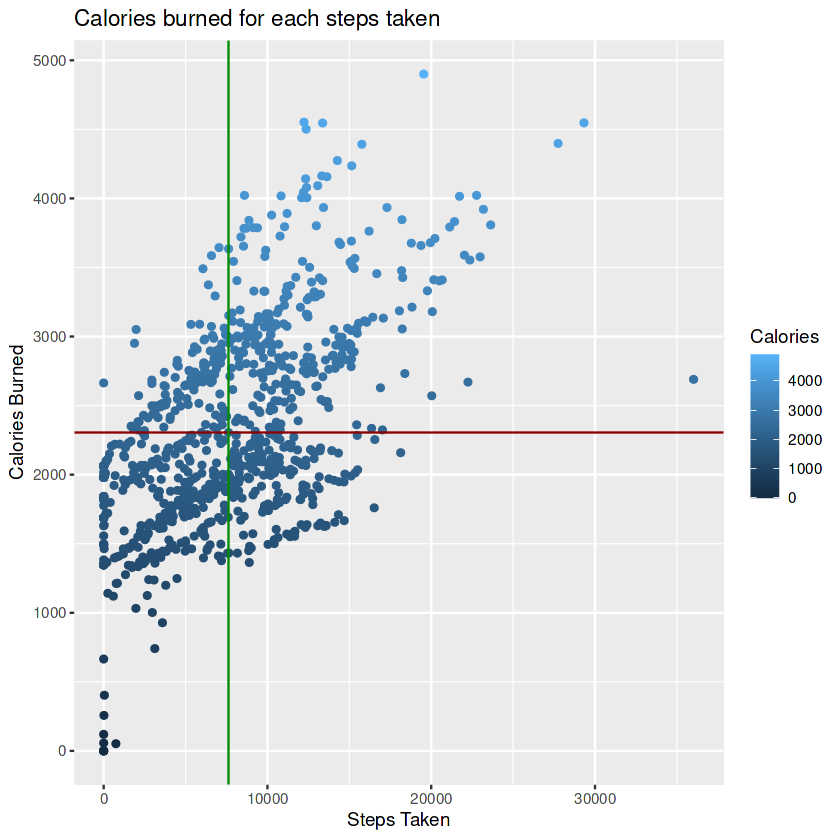

In [18]:
# Plotting scatter plot between calories burned vs steps taken
ggplot(daily_activity, aes(x = TotalSteps, y = Calories, color = Calories)) +
geom_point() +
labs(titles = "Calories burned for each steps taken", x = "Steps Taken", y = "Calories Burned") +
geom_hline(yintercept = mean(daily_activity$Calories), color = "red4") +
geom_vline(xintercept = mean(daily_activity$TotalSteps), color = "green4")

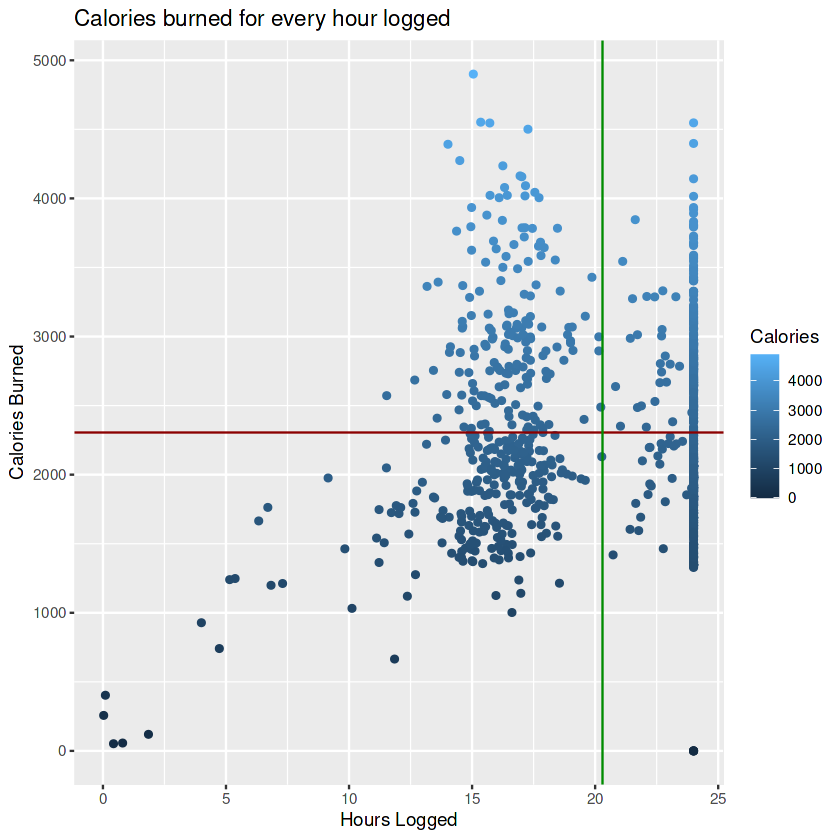

In [19]:
# Plotting scatter plot between calories burned vs hours logged
ggplot(daily_activity, aes(x = TotalHours, y = Calories, color = Calories)) +
geom_point() +
labs(titles = "Calories burned for every hour logged", x = "Hours Logged", y = "Calories Burned") +
geom_hline(yintercept = mean(daily_activity$Calories), color = "red4") +
geom_vline(xintercept = mean(daily_activity$TotalHours), color = "green4")

In [21]:
activity <- data.frame(
    activity = c("Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Sedentary Minutes"),
    value = c(sum(daily_activity$VeryActiveMinutes), sum(daily_activity$FairlyActiveMinutes), sum(daily_activity$LightlyActiveMinutes), sum(daily_activity$SedentaryMinutes)))

In [22]:
activity_percent <- activity %>%
    mutate(perc = `value` / sum(`value`)) %>% 
    arrange(perc) %>%
    mutate(labels = scales::percent(perc))

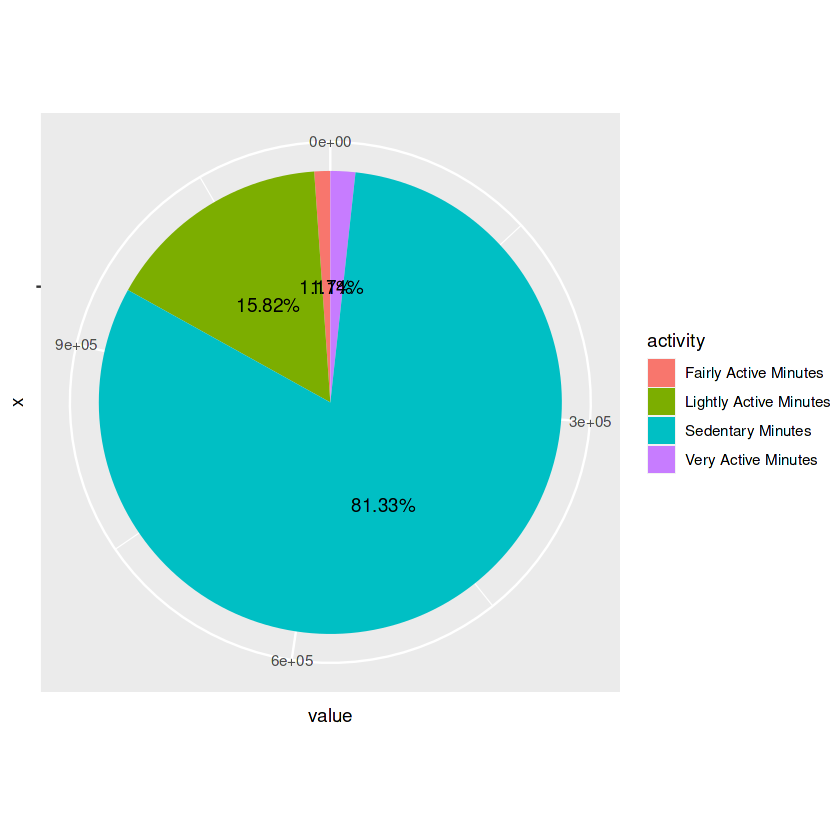

In [23]:
# Plotting pie chart for each acitivty
ggplot(activity_percent, aes(x = "", y = value, fill = activity)) +
geom_bar(stat = "identity", width = 1) +
geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5)) +
coord_polar(theta = "y")